## Job Market Analysis and Recommendation Syste


Import the important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

Import the Datasets

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Project-08\all_upwork_jobs_2024-02-07-2024-03-24.csv')
df.head(5)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


check the dataset dimesion

In [3]:
df.shape

(244828, 8)

In [4]:
df.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [6]:
df['title'].value_counts()

title
Social Media Manager                                  419
Virtual Assistant                                     339
Logo Design                                           311
Video Editor                                          298
Graphic Designer                                      292
                                                     ... 
Virtual assistant to the CEO                            1
Run AI workloads in a distributed fashion               1
Coinmarketcap account creation, comments and likes      1
QGIS to Google Earth                                    1
Creating a UGC Ad for Our Mobile Game                   1
Name: count, Length: 205470, dtype: int64

In [7]:
df['country'] = df['country'].ffill().bfill()

In [8]:
# Handle missing values in the 'title' column by replacing them with an empty string
df['title'].fillna('', inplace=True)

In [9]:
# Handle missing values in the 'Country' column by replacing them with an empty string
df['country'].fillna('',inplace=True)

In [10]:
# Drop rows with missing target values (budget)
#df.dropna(subset=['budget'], inplace=True)

In [11]:
df.isnull().sum()

title                  0
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country                0
dtype: int64

In [12]:
# Find the minimum value in the 'budget' column, ignoring NaNs
min_budget = df['budget'].min(skipna=True)

# Fill NaN values in the 'demand' column with the minimum value
df['budget'].fillna(min_budget, inplace=True)

In [13]:
# Fill missing values with the minimum value of each column
df['hourly_low'].fillna(df['hourly_low'].min(), inplace=True)
df['hourly_high'].fillna(df['hourly_high'].min(), inplace=True)

In [14]:
# Drop the unnecessary columns
df.drop(['link'],axis=1,inplace=True)

In [15]:
df.isnull().sum()

title             0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64

### Task 1: Analyze the correlation between job title keywords and offered salaries

Objective: To find patterns between the keywords in job titles and the corresponding salaries offered.

In [16]:
# Data Preparation
df['published_date'] = pd.to_datetime(df['published_date'])
df['Published_year_month'] = df['published_date'].dt.to_period('M')
df['Salary'] = np.where(df['is_hourly'],(df['hourly_low']+df['hourly_high'])/2,df['budget'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_16296\3131647336.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Published_year_month'] = df['published_date'].dt.to_period('M')


In [17]:
# Drop rows with missing target values (budget) and publishead Date
df.drop(['budget','published_date'],axis=1,inplace=True)

In [18]:
df.head(3)

,title,is_hourly,hourly_low,hourly_high,country,Published_year_month,Salary
0,Experienced Media Buyer For Solar Pannel and R...,False,3.0,3.0,United States,2024-02,500.0
1,Full Stack Developer,False,3.0,3.0,United States,2024-02,1100.0
2,SMMA Bubble App,True,10.0,30.0,United States,2024-02,20.0


Preprocess the job titles to extract keywords

In [19]:
# Extract keywords from job titles (dummy function, replace with your logic)
def extract_keywords(title):
    return title.split()

keywords = df['title'].apply(extract_keywords)

In [20]:
# Vectorize keywords using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(keywords.apply(lambda x: ' '.join(x)))

In [21]:
# Train a Linear Regression model
X_train, X_test, y_train, y_test = train_test_split(X, df['Salary'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Analyze correlation between keywords and salaries
coefficients = pd.DataFrame({'Keyword': vectorizer.get_feature_names_out(), 'Coefficient': model.coef_})
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)

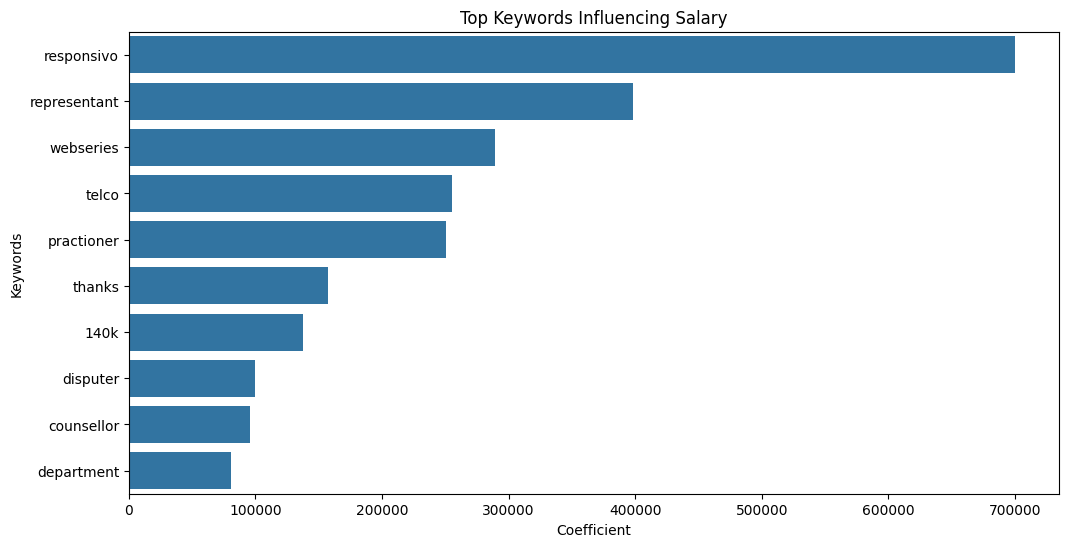

In [23]:
# Visualize the top keywords influencing salaries
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Keyword', data=coefficients_sorted.head(10))
plt.title('Top Keywords Influencing Salary')
plt.xlabel('Coefficient')
plt.ylabel('Keywords')
plt.show()

Deliverables: A report detailing the correlation, supported by statistical analysis and
visualizations.

In [24]:
# Calculate the median salary
median_salary = df['Salary'].median()

In [25]:
# Generate a report (example)
print("Report: Correlation between Job Title Keywords and Salaries")
print("----------------")
print("Top keywords influencing salary:")
print(coefficients_sorted.head(10))
print("\nSummary statistics:")
print("Mean Salary:", df['Salary'].mean())
print("Median salary:", median_salary)
print("Standard deviation of salary:", df['Salary'].std())

Report: Correlation between Job Title Keywords and Salaries
----------------
Top keywords influencing salary:
            Keyword    Coefficient
29102    responsivo  699773.941109
28911  representant  398312.254059
37352     webseries  289549.692525
33938         telco  255282.652790
26583    practioner  250760.955747
34210        thanks  157556.653838
239            140k  137542.883232
10968      disputer   99522.481525
9044     counsellor   95729.410852
10294    department   80963.711563

Summary statistics:
Mean Salary: 399.36493987615796
Median salary: 25.0
Standard deviation of salary: 10256.026730571217


#### Task 2: Identify emerging job categories based on posting frequency

● Objective: To identify new and emerging job categories by analyzing the frequency and
trend of job postings.

In [26]:
#Extract job categories from job titles (example function)
def extract_job_category(title):
    # Check if the title is empty or contains only whitespace
    if not title.strip():
        return None
    # Extract job category from title
    return title.split()[0]

# Apply the function to the 'title' column and create a new 'job_title' column
df['job_title'] = df['title'].apply(extract_job_category)

print(df)

                                                    title  is_hourly  \
0       Experienced Media Buyer For Solar Pannel and R...      False   
1                                    Full Stack Developer      False   
2                                         SMMA Bubble App       True   
3                  Talent Hunter Specialized in Marketing       True   
4                                           Data Engineer      False   
...                                                   ...        ...   
244823  Need Facebook advertising experts to launch pr...       True   
244824          Digital/Telemarketing/Sales/OutSide Sales      False   
244825                           WordPress Template Edits       True   
244826            ELEMENTOR PRO For quick fix (Wordpress)      False   
244827              Creating a UGC Ad for Our Mobile Game      False   

        hourly_low  hourly_high        country Published_year_month  Salary  \
0              3.0          3.0  United States          

In [27]:
# Extract job categories from job titles
df['job_title'] = df['title'].apply(lambda x: x.split(' ')[:2])  # Assuming job categories are the two word in the title

In [28]:
# Convert lists in 'job_category' column to strings
df['job_title'] = df['job_title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [29]:
# Analyze frequency of job categories over 
job_title_counts = df.groupby(['Published_year_month', 'title']).size().unstack(fill_value=0)

In [30]:
# Identify emerging job categories based on growth trend
category_growth = job_title_counts.diff().fillna(0)
emerging_categories = category_growth.sum().nlargest(3).index.tolist()

In [31]:
# Group by year and month, and count the number of job postings per month
job_postings_per_month = df.groupby('Published_year_month').size()

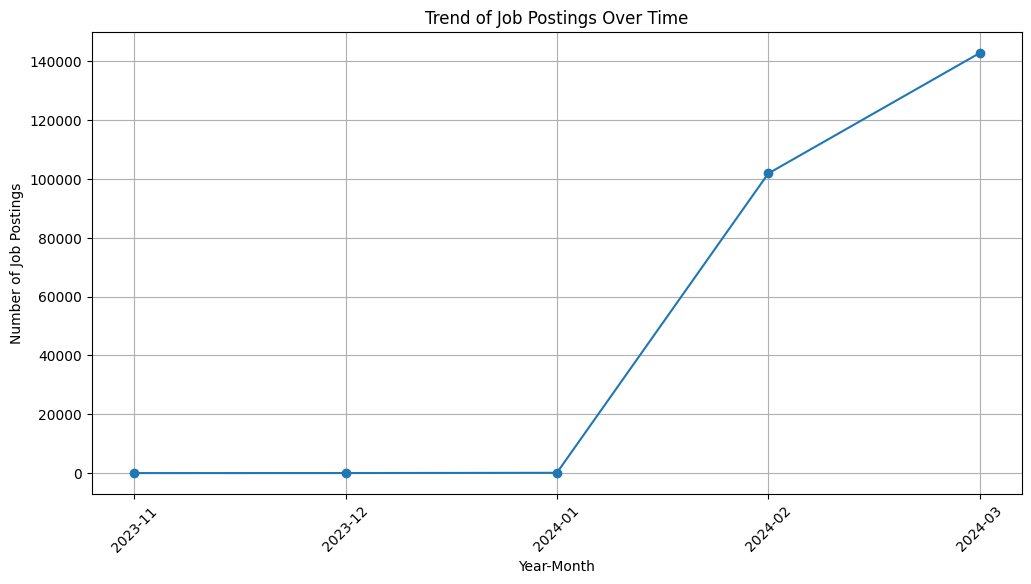

In [32]:
# Plot the trend of job postings over time
plt.figure(figsize=(12, 6))
plt.plot(job_postings_per_month.index.astype(str), job_postings_per_month.values, marker='o')
plt.title('Trend of Job Postings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### Deliverables: A list of emerging job categories with growth analysis over time.

In [33]:
# Calculate growth trend of job categories
category_growth = job_title_counts.diff().fillna(0)
total_growth = category_growth.sum(axis=0)  # Total growth across all months for each category

In [34]:
# Identify emerging job categories with highest growth
emerging_categories = total_growth.nlargest(10).index.tolist()

In [35]:
# Output the list of emerging job categories
print("Emerging Job Categories with Growth Analysis:")
for category in emerging_categories:
    growth = total_growth[category]
    print(f"- {category}: Total Growth = {growth}")

Emerging Job Categories with Growth Analysis:
- Social Media Manager: Total Growth = 245.0
- Video Editor: Total Growth = 202.0
- Logo Design: Total Growth = 201.0
- Graphic Designer: Total Growth = 172.0
- Virtual Assistant: Total Growth = 166.0
- Logo design: Total Growth = 100.0
- Logo Designer: Total Growth = 88.0
- Lead Generation: Total Growth = 83.0
- Full Stack Developer: Total Growth = 80.0
- Appointment Setter: Total Growth = 72.0


##### Task 3: Predict high-demand job roles by analyzing job posting patterns over time
● Objective: To forecast high-demand job roles based on historical job posting data.

In [36]:
df = df.drop(['title'],axis=1)

In [37]:
df

,is_hourly,hourly_low,hourly_high,country,Published_year_month,Salary,job_title
0,False,3.0,3.0,United States,2024-02,500.0,Experienced Media
1,False,3.0,3.0,United States,2024-02,1100.0,Full Stack
2,True,10.0,30.0,United States,2024-02,20.0,SMMA Bubble
3,True,3.0,3.0,United States,2024-02,3.0,Talent Hunter
4,False,3.0,3.0,India,2024-02,650.0,Data Engineer
...,...,...,...,...,...,...,...
244823,True,20.0,100.0,Zambia,2024-03,60.0,Need Facebook
244824,False,3.0,3.0,Sri Lanka,2024-03,100.0,Digital/Telemarketing/Sales/OutSide Sales
244825,True,5.0,30.0,United States,2024-03,17.5,WordPress Template
244826,False,3.0,3.0,France,2024-03,15.0,ELEMENTOR PRO


In [38]:
df.to_csv('clean_data.csv')

In [39]:
df = df.iloc[:50000]

In [40]:
df.to_csv('finel_clean_data.csv')

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score


In [42]:
# Ensure the Published_year_month is in string format
df['Published_year_month'] = df['Published_year_month'].astype(str)

# Convert period to datetime and extract year and month
df['Published_year_month'] = pd.to_datetime(df['Published_year_month'], format='%Y-%m')
df['Published_year'] = df['Published_year_month'].dt.year
df['Published_month'] = df['Published_year_month'].dt.month


C:\Users\Dell\AppData\Local\Temp\ipykernel_16296\1550317730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Published_year_month'] = df['Published_year_month'].astype(str)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16296\1550317730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Published_year_month'] = pd.to_datetime(df['Published_year_month'], format='%Y-%m')
C:\Users\Dell\AppData\Local\Temp\ipykernel_16296\1550317730.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [43]:
df = df.drop(['Published_year_month'],axis=1)

In [44]:
# Function to convert salary to monthly equivalent
def convert_to_monthly(row):
    if row['is_hourly']:
        avg_hourly_rate = (row['hourly_low'] + row['hourly_high']) / 2
        return avg_hourly_rate * 40 * 4
    else:
        return row['Salary']

df['Salary'] = df.apply(convert_to_monthly, axis=1)

In [45]:
# Encoding categorical variables
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['job_title'] = le.fit_transform(df['job_title'])

In [46]:
# Encoding the 'is_hourly' column
le = LabelEncoder()
df['is_hourly'] = le.fit_transform(df['is_hourly'])

In [47]:
# Create synthetic 'high_demand' column with the same length as the DataFrame
# For the sake of this example, we'll create a random binary target variable
np.random.seed(42)  # For reproducibility
df['high_demand'] = np.random.randint(0, 2, size=len(df))

In [48]:
df

,is_hourly,hourly_low,hourly_high,country,Salary,job_title,Published_year,Published_month,high_demand
0,0,3.0,3.0,175,500.0,8281,2024,2,0
1,0,3.0,3.0,175,1100.0,9823,2024,2,1
2,1,10.0,30.0,175,3200.0,19227,2024,2,0
3,1,3.0,3.0,175,480.0,21669,2024,2,0
4,0,3.0,3.0,76,650.0,6113,2024,2,0
...,...,...,...,...,...,...,...,...,...
49995,1,3.0,3.0,174,480.0,13978,2024,2,1
49996,1,15.0,50.0,116,5200.0,23917,2024,2,1
49997,1,4.0,6.0,175,800.0,4812,2024,2,0
49998,1,5.0,30.0,175,2800.0,12866,2024,2,1


In [49]:
df = df.iloc[:50000]

In [50]:
# Features and target variable
X = df[['is_hourly', 'hourly_low', 'hourly_high', 'Published_year', 'Published_month','country', 'job_title','high_demand']]
y = df['Salary']

In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [53]:
# Predictions
y_pred = model.predict(X_test)

In [54]:
# Evaluate model performance (optional)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 248465594.0924
R-squared: -4.081713399238167


In [55]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5717
              precision    recall  f1-score   support

         5.0       0.20      0.20      0.20       226
         6.0       0.33      0.21      0.26        14
         7.0       0.10      0.14      0.11        14
         8.0       0.00      0.00      0.00        12
         9.0       0.00      0.00      0.00         1
        10.0       0.09      0.09      0.09       245
        11.0       0.00      0.00      0.00         1
        12.0       0.11      0.09      0.10        11
        13.0       0.00      0.00      0.00         5
        14.0       0.50      1.00      0.67         2
        15.0       0.11      0.09      0.10       127
        16.0       0.00      0.00      0.00         2
        17.0       0.00      0.00      0.00         1
        18.0       0.25      0.50      0.33         4
        19.0       0.00      0.00      0.00         1
        20.0       0.09      0.11      0.10       208
        21.0       0.00      0.00      0.00         1
        22

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Objective: To forecast high-demand job roles based on historical job posting data

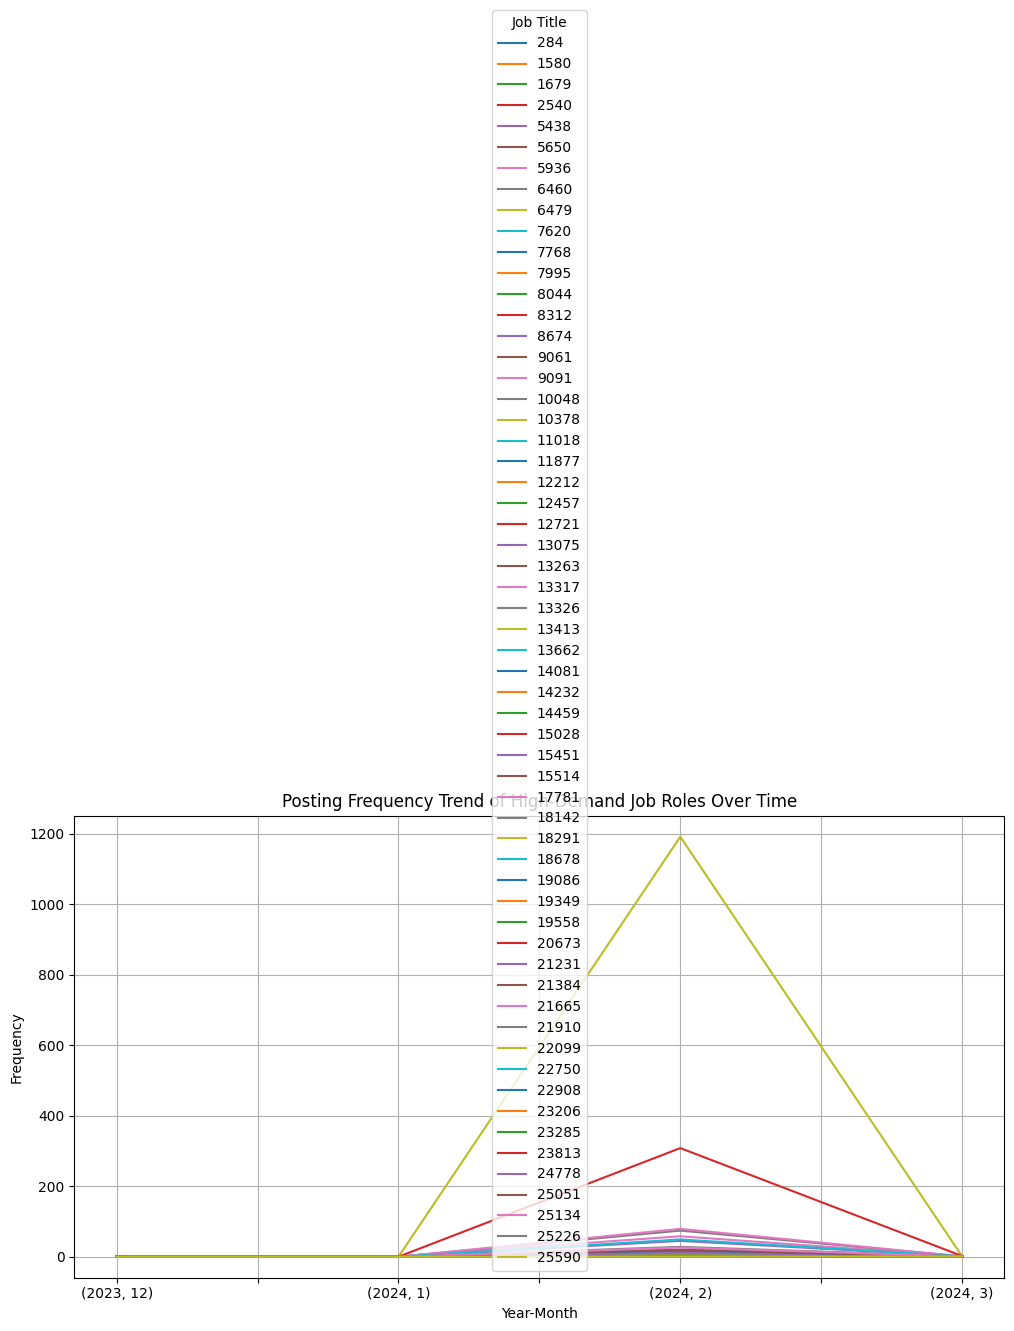

High-Demand Job Roles: [284, 1580, 1679, 2540, 5438, 5650, 5936, 6460, 6479, 7620, 7768, 7995, 8044, 8312, 8674, 9061, 9091, 10048, 10378, 11018, 11877, 12212, 12457, 12721, 13075, 13263, 13317, 13326, 13413, 13662, 14081, 14232, 14459, 15028, 15451, 15514, 17781, 18142, 18291, 18678, 19086, 19349, 19558, 20673, 21231, 21384, 21665, 21910, 22099, 22750, 22908, 23206, 23285, 23813, 24778, 25051, 25134, 25226, 25590]


In [56]:
# Analyze the frequency of job postings for each job role over time
job_role_counts = df.groupby(['Published_year','Published_month','job_title']).size().unstack(fill_value=0)

# Step 3: Identify high-demand job roles based on their posting frequency trend
demand_trend = job_role_counts.diff().fillna(0).sum(axis=0)
high_demand_roles = demand_trend[demand_trend > 0].index.tolist()

# Step 4: Visualize the posting frequency trend of high-demand job roles
plt.figure(figsize=(12, 6))
job_role_counts[high_demand_roles].plot(ax=plt.gca())
plt.title('Posting Frequency Trend of High-Demand Job Roles Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.legend(title='Job Title')
plt.grid(True)
plt.show()

print("High-Demand Job Roles:", high_demand_roles)

Deliverables: A predictive model with accuracy metrics, and a visual representation of
demand trends over time.


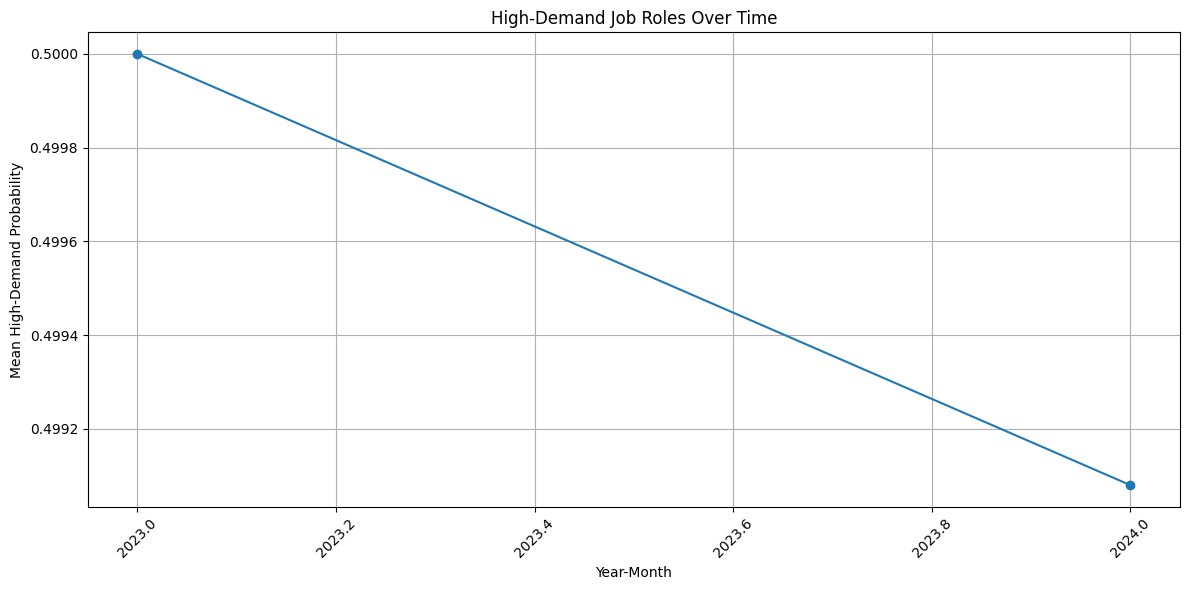

In [57]:
# Forecasting demand trends over time
demand_over_time = df.groupby('Published_year')['high_demand'].mean()

# Visualization
plt.figure(figsize=(12, 6))
demand_over_time.plot(marker='o')
plt.title('High-Demand Job Roles Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Mean High-Demand Probability')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Task 4: Compare average hourly rates across different countries
● Objective: To compare and analyze the average hourly rates offered across different
geographical locations.


In [58]:
# Group by country and calculate average hourly rate
avg_hourly_rates = df.groupby('country')['hourly_high'].mean().reset_index()

# Compare and analyze average hourly rates
print("Average Hourly Rates Across Different Countries:")
print(avg_hourly_rates)

Average Hourly Rates Across Different Countries:
     country  hourly_high
0          0     3.000000
1          1    10.512821
2          2     9.903226
3          3     6.000000
4          4    10.800000
..       ...          ...
181      181    19.764706
182      182    19.978947
183      183     9.750000
184      184     6.266667
185      185    17.894737

[186 rows x 2 columns]


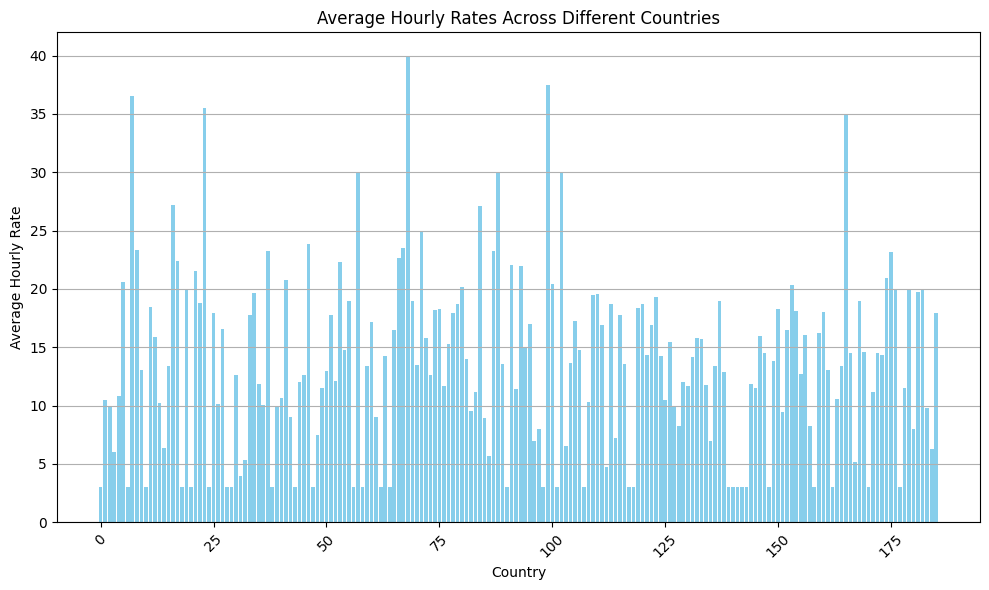

In [59]:
# Step 5: Visualization (optional)
plt.figure(figsize=(10, 6))
plt.bar(avg_hourly_rates['country'], avg_hourly_rates['hourly_high'], color='skyblue')
plt.title('Average Hourly Rates Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Average Hourly Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

● Deliverables: An interactive map or chart showing hourly rates by country.


In [60]:
#Visualization with Plotly
import plotly.express as px
fig = px.bar(df, x='country', y='hourly_high', color='country',
             title='Hourly Rates by Country',
             labels={'hourly_high': 'Average Hourly Rate', 'country': 'Country'},
             hover_name='country',
             template='plotly_white')

In [61]:
# Customize layout (optional)
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Average Hourly Rate',
    xaxis={'categoryorder': 'total descending'},
    yaxis_tickprefix='$',
    yaxis_tickformat=',.0f',
    bargap=0.2,
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell")
)

# Show interactive plot
fig.show()


##### Task 5: Create a job recommendation engine based on current job postings
● Objective: To develop a personalized job recommendation engine

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [72]:
# Convert all job_title entries to strings, handling NaN values
df['job_title'] = df['job_title'].fillna('').astype(str)

In [73]:
#Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [74]:
#Fit and transform the job title data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['job_title'])

In [94]:
def recommend_job(job_tile,n_recommendation=5):
    recommendations = df.copy()
    #Transform the input job title into TF-IDF vector
    job_title_tfidf = tfidf_vectorizer.transform([job_title])
    # compute cosine similarity between input job title and all job titles.
    cosine_similarties = linear_kernel(job_title_tfidf,tfidf_matrix).flatten()
    # Get incides of job sorted by similarity 
    similar_job_incides = cosine_similarties.asgsort()[::-1]
    similar_job_incides = similar_job_incides[1:n_recommendation+1]
    #Return recommended job titles and their similarity scores
    recommendation = df.iloc[similar_job_incides][['job_title','hourly_high']]
    return recommendation